In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(
    'https://gist.githubusercontent.com/andron23/f73a19243564d80a388db2b7b1542fd2/raw/2479b4326f6c8ae13d06060fb8510d04bcf06113/apteka.csv',
    sep = ';')

In [4]:
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09.000,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00.000,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23.000,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56.000,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39.000,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16
...,...,...,...,...,...,...,...,...
38481,2022-06-09 20:45:32.000,Аптека 11,2000200244974,32,0,1341,1341,15#18001790#66269#18_120
38482,2022-06-09 20:55:32.000,Аптека 11,2000200239246,38,0,1445,1445,15#18001790#66269#18_123
38483,2022-06-09 20:59:41.000,Аптека 11,2000200238867,57,0,1912,1912,15#18001790#66269#18_126
38484,2022-06-09 21:07:59.000,Аптека 11,2000200165811,2,0,278,278,15#18001790#66269#18_129


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        38486 non-null  object
 1   shop            38486 non-null  object
 2   card            38486 non-null  object
 3   bonus_earned    38486 non-null  int64 
 4   bonus_spent     38486 non-null  int64 
 5   summ            38486 non-null  int64 
 6   summ_with_disc  38486 non-null  int64 
 7   doc_id          38486 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.3+ MB


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16
...,...,...,...,...,...,...,...,...
38481,2022-06-09 20:45:32,Аптека 11,2000200244974,32,0,1341,1341,15#18001790#66269#18_120
38482,2022-06-09 20:55:32,Аптека 11,2000200239246,38,0,1445,1445,15#18001790#66269#18_123
38483,2022-06-09 20:59:41,Аптека 11,2000200238867,57,0,1912,1912,15#18001790#66269#18_126
38484,2022-06-09 21:07:59,Аптека 11,2000200165811,2,0,278,278,15#18001790#66269#18_129


If at the time of purchase the cash register was offline, then instead of the card number, an encrypted sequence of characters is recorded that does not allow the client to be identified. Therefore, we leave only those rows in which the value of the “map” column begins with 2000.

In [8]:
df = df[df['card'].str.startswith('2000')]

In [9]:
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16
...,...,...,...,...,...,...,...,...
38481,2022-06-09 20:45:32,Аптека 11,2000200244974,32,0,1341,1341,15#18001790#66269#18_120
38482,2022-06-09 20:55:32,Аптека 11,2000200239246,38,0,1445,1445,15#18001790#66269#18_123
38483,2022-06-09 20:59:41,Аптека 11,2000200238867,57,0,1912,1912,15#18001790#66269#18_126
38484,2022-06-09 21:07:59,Аптека 11,2000200165811,2,0,278,278,15#18001790#66269#18_129


In [10]:
df = df.sort_values(['card', 'datetime'])

In [11]:
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [12]:
max(df['datetime'])

Timestamp('2022-06-09 21:49:45')

I create df2 that contains the following data: card number, purchase amounts for each card, number of purchases for each card and the date of the last purchase. I need this data for RFM Analysis.

In [13]:
df2= df.groupby('card').agg(
    purchase_sum  = ('summ_with_disc','sum'),
    purchase_count  = ('summ_with_disc','count'),
    last_purchase = ('datetime', 'last')
).reset_index()

In [14]:
df2

,card,purchase_sum,purchase_count,last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20
1,2000200150022,1351,1,2021-12-07 20:25:21
2,2000200150053,713,2,2022-03-17 20:50:23
3,2000200150091,3549,5,2022-06-05 11:49:47
4,2000200150107,1735,3,2022-06-02 17:54:19
...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45
5922,2000200259381,245,1,2022-06-07 19:19:12
5923,2000200259398,395,1,2022-06-07 19:37:59
5924,2000200259404,784,1,2022-06-08 09:46:52


determine how long ago the last purchase was made.

In [15]:
df2['days_since_last_purchase'] = (max(df['datetime']) - df2['last_purchase']).dt.days

In [16]:
df2

,card,purchase_sum,purchase_count,last_purchase,days_since_last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


for determining Recency I use histogram and boxplot

<Axes: xlabel='days_since_last_purchase', ylabel='Count'>

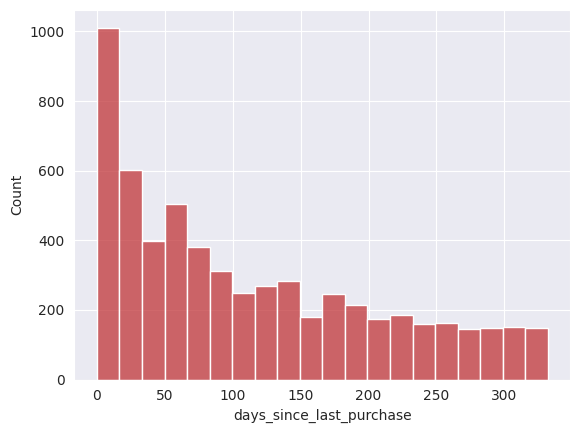

In [17]:
sns.set_palette('RdBu')
sns.set_style(style = 'darkgrid')
sns.histplot(df2['days_since_last_purchase'])

Text(0, 1, 'count')

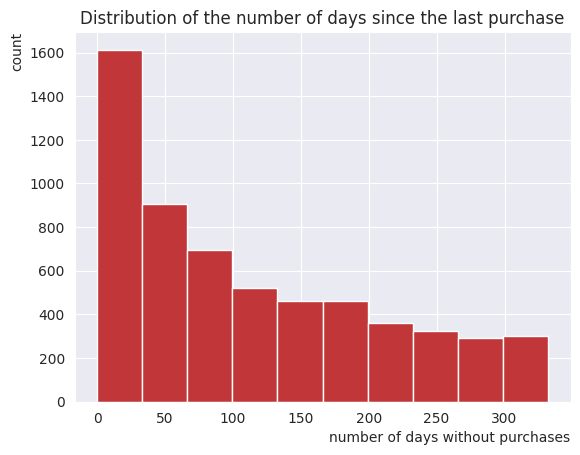

In [18]:
plt.hist(df2['days_since_last_purchase'])
plt.title('Distribution of the number of days since the last purchase')
plt.xlabel('number of days without purchases', loc = 'right')
plt.ylabel('count', loc = 'top', rotation = 90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7986faed9db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7986faeda2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7986faed9b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7986faeda830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7986faedaad0>],
 'means': []}

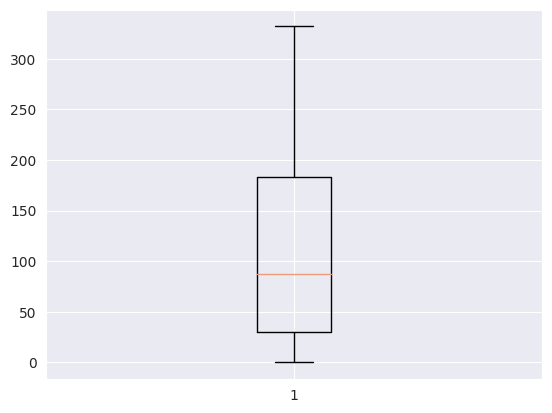

In [19]:
plt.boxplot(df2['days_since_last_purchase'])

Using the histogram, I differentiate between three groups as a scope for recency: bought in the last 30 days, bought between 30 and 130 days and bought more than 130 days ago

In [20]:
def recency_scope(recency):
  if recency < 30:
    return 1
  elif (recency >= 30) and (recency < 130):
    return 2
  else:
    return 3
df2['recency'] = df2['days_since_last_purchase'].apply(recency_scope)

distribution of customers to three groups of purchase recency

<Axes: xlabel='recency', ylabel='count'>

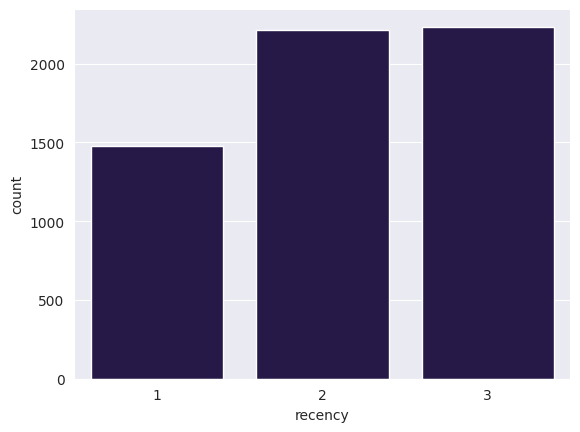

In [21]:
sns.set_palette('magma')
sns.countplot(data = df2, x = 'recency')

purchase frequency distribution

<Axes: xlabel='purchase_count', ylabel='Count'>

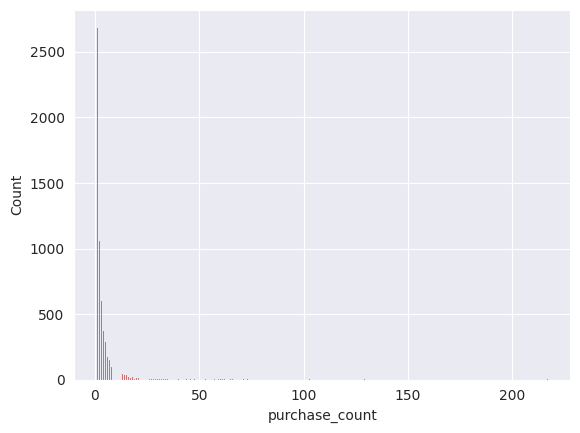

In [22]:
sns.set_palette('RdBu')
sns.histplot(df2['purchase_count'])

<Axes: xlabel='purchase_count', ylabel='Count'>

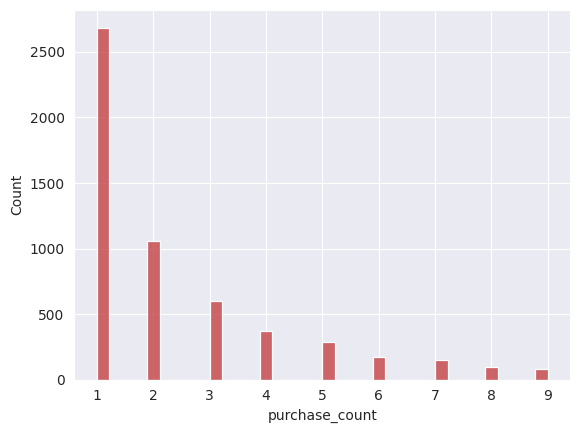

In [23]:
sns.histplot(df2[df2['purchase_count'] < 10] ['purchase_count'])

Text(0, 1, 'count')

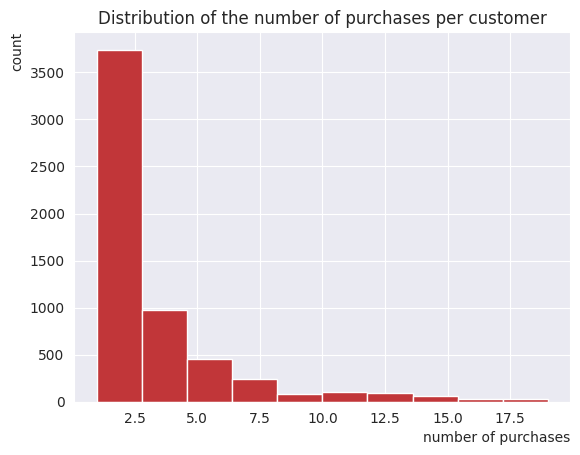

In [24]:
plt.hist(df2[df2['purchase_count'] < 20] ['purchase_count'])
plt.title('Distribution of the number of purchases per customer')
plt.xlabel('number of purchases', loc = 'right')
plt.ylabel('count', loc = 'top', rotation = 90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7986fa5d7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7986fa60c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7986fa5d7af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7986fa60c850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7986fa60caf0>],
 'means': []}

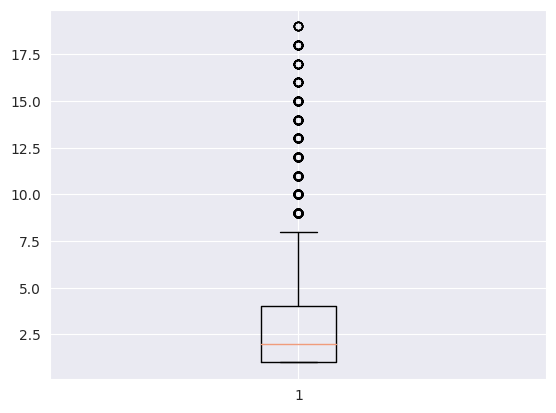

In [25]:
plt.boxplot(df2[df2['purchase_count'] < 20] ['purchase_count'])

Using the histogram, I differentiate between three groups as a scope for frequency: bought 1 or 2 times , bought between 3 and 7 times and bought more than 7 times

In [26]:
def frequency_score(freq):
  if freq <= 2:
    return 3
  elif (freq > 2) and (freq <= 7):
    return 2
  else:
    return 1
df2['frequency']= df2['purchase_count'].apply(frequency_score)

distribution of customers to three groups of purchase frequency

<Axes: xlabel='frequency', ylabel='count'>

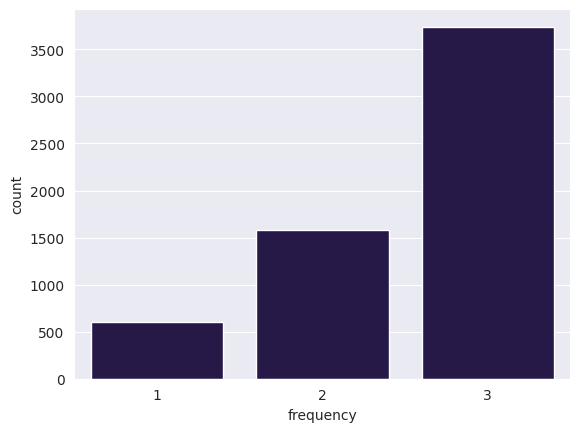

In [27]:
sns.set_palette('magma')
sns.countplot(data = df2, x = 'frequency')

distribution of purchase amounts

<Axes: xlabel='purchase_sum', ylabel='Count'>

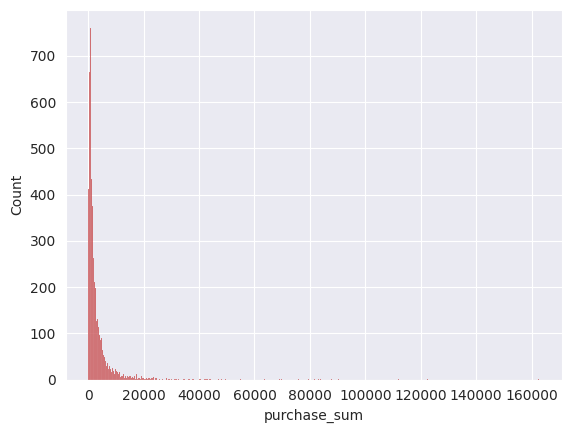

In [28]:
sns.set_palette('RdBu')
sns.histplot(df2['purchase_sum'])

<Axes: xlabel='purchase_sum', ylabel='Count'>

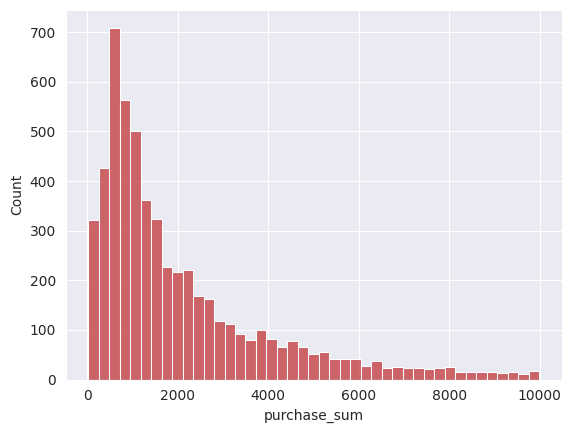

In [29]:
sns.histplot(df2[df2['purchase_sum'] < 10000]['purchase_sum'])

Text(0, 1, 'count')

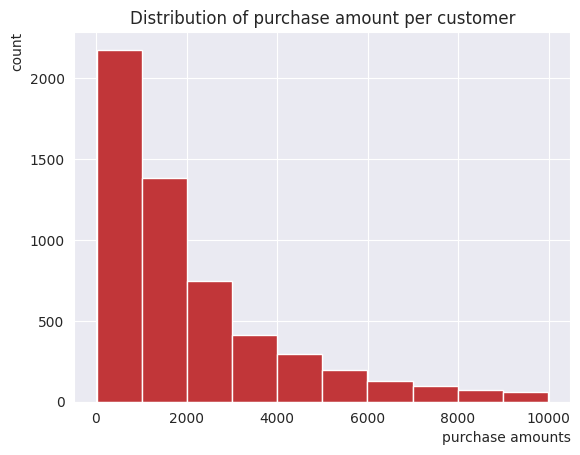

In [30]:
plt.hist(df2[df2['purchase_sum'] < 10000]['purchase_sum'])
plt.title('Distribution of purchase amount per customer')
plt.xlabel('purchase amounts', loc = 'right')
plt.ylabel('count', loc = 'top', rotation = 90)
#plt.savefig('/content/histM.png')

Using a histogram, I differentiate three groups based on the amount of purchases: bought under 2000, bought between 2000 and 6000, and bought over 6000.

In [31]:
def monetary_score(mon):
  if mon <= 2000:
    return 3
  elif (mon > 2000) and (mon <= 6000):
    return 2
  else:
    return 1

df2['monetary'] = df2['purchase_sum'].apply(monetary_score)

distribution of customers to three groups of Monetary

<Axes: xlabel='monetary', ylabel='count'>

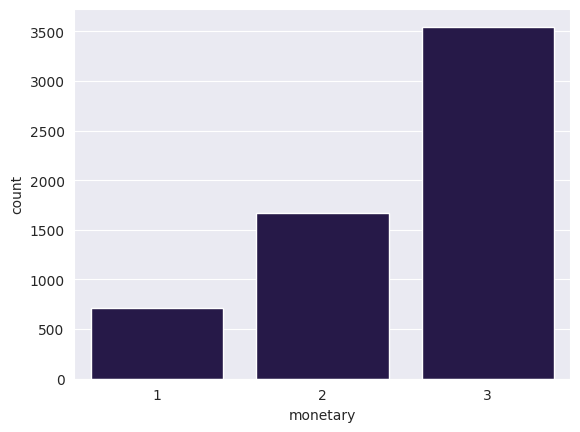

In [32]:
sns.set_palette('magma')
sns.countplot(data = df2, x = 'monetary')

sum up the three columns

In [33]:
df2['rfm_segment'] = df2.apply(lambda x: str(x['recency']) + str(x['frequency']) + str(x['monetary']), axis = 1)

In [34]:
df2.head()

,card,purchase_sum,purchase_count,last_purchase,days_since_last_purchase,recency,frequency,monetary,rfm_segment
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,3,3,333
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,3,3,333
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,3,3,233
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,2,2,122
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,2,3,123


Text(0, 1, 'RFM segment')

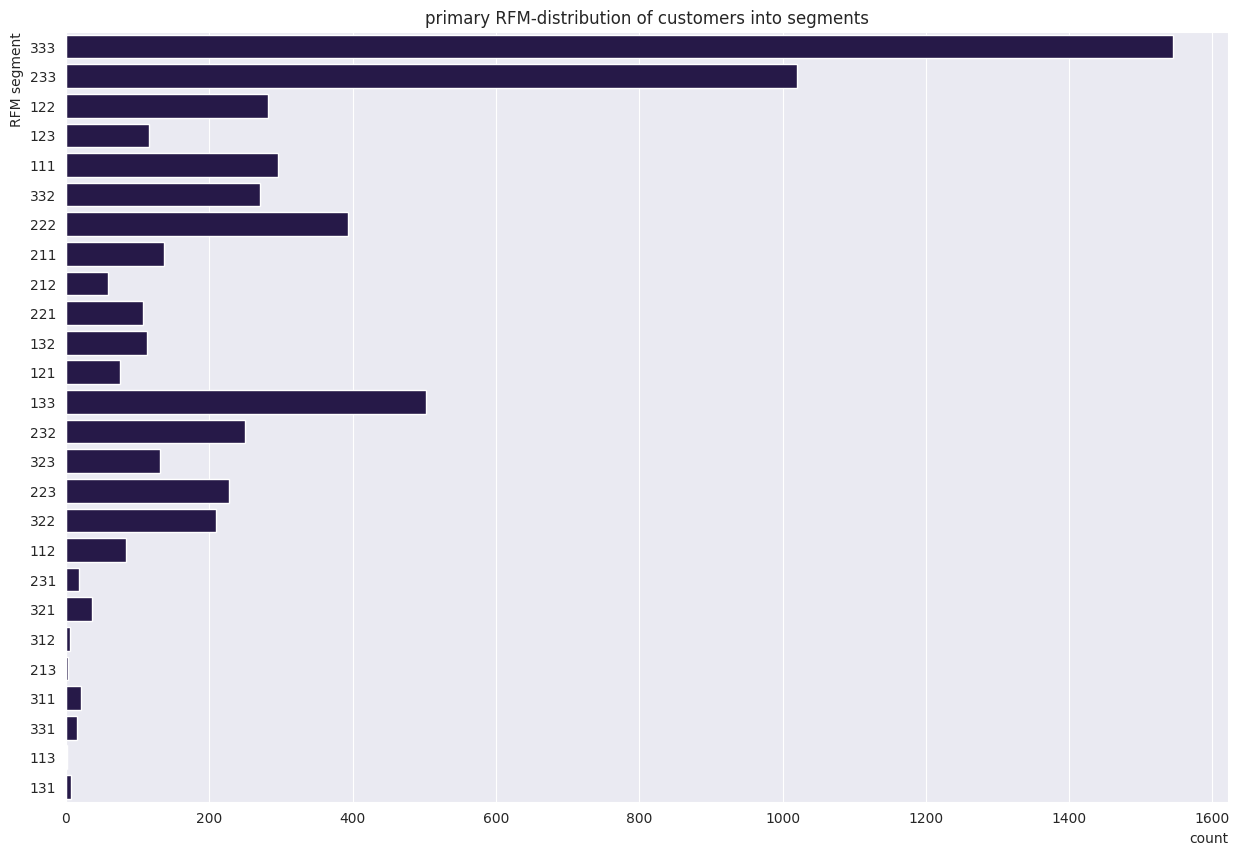

In [35]:
plt.figure(figsize = (15,10))
sns.countplot(y=df2['rfm_segment'])
plt.title('primary RFM-distribution of customers into segments')
sns.set_palette('PRGn')
plt.xlabel('count', loc = 'right')
plt.ylabel('RFM segment', loc = 'top', rotation = 90)

in total we received 26 groups. It makes sense to combine some segments if they are very small in terms of the number of buyers or have similar strategies for working with them.

In [36]:
def rfm_group(rfm_segm):
  if rfm_segm == '111':
    return 'VIP'
  elif (rfm_segm == '113') | (rfm_segm == '112') | (rfm_segm == '212') | (rfm_segm == '213')| (rfm_segm == '123') | (rfm_segm == '122'):
    return 'loyal'
  elif (rfm_segm == '121') | (rfm_segm == '221') | (rfm_segm == '211'):
    return 'whales'
  elif (rfm_segm == '321') | (rfm_segm == '311') | (rfm_segm == '231') | (rfm_segm == '331'):
    return "swimming away whales"
  elif (rfm_segm == '131') | (rfm_segm == '132') | (rfm_segm == '133'):
    return "newcomers"
  elif (rfm_segm == '232') | (rfm_segm == '222') | (rfm_segm == '223') | (rfm_segm == '312') | (rfm_segm == '322'):
    return "potencial"
  elif (rfm_segm == '332') | (rfm_segm == '323')  | (rfm_segm == '233'):
    return "leaving"
  elif rfm_segm == '333':
    return "lost"

df2['log_group'] = df2['rfm_segment'].apply(rfm_group)

In [37]:
df2.head(10)

,card,purchase_sum,purchase_count,last_purchase,days_since_last_purchase,recency,frequency,monetary,rfm_segment,log_group
0,2000200150015,21,1,2021-07-19 09:37:20,325,3,3,3,333,lost
1,2000200150022,1351,1,2021-12-07 20:25:21,184,3,3,3,333,lost
2,2000200150053,713,2,2022-03-17 20:50:23,84,2,3,3,233,leaving
3,2000200150091,3549,5,2022-06-05 11:49:47,4,1,2,2,122,loyal
4,2000200150107,1735,3,2022-06-02 17:54:19,7,1,2,3,123,loyal
5,2000200150138,129,1,2021-10-26 14:31:20,226,3,3,3,333,lost
6,2000200150145,12426,14,2022-05-19 19:40:43,21,1,1,1,111,VIP
7,2000200150176,1192,1,2021-08-11 10:51:32,302,3,3,3,333,lost
8,2000200150190,2327,1,2021-12-26 11:23:36,165,3,3,2,332,leaving
9,2000200150237,2772,3,2022-04-25 18:23:07,45,2,2,2,222,potencial


In [38]:
df3= df2.groupby('log_group').agg(
    count  = ('card','count')
).reset_index()
df3

,log_group,count
0,VIP,296
1,leaving,1423
2,lost,1545
3,loyal,546
4,newcomers,622
5,potencial,1085
6,swimming away whales,90
7,whales,319


([<matplotlib.patches.Wedge at 0x7986f9e1ecb0>,
 [Text(1.086484529236156, 0.17190511257809887, 'VIP'),
  Text(0.5298472845414477, 0.9639822898083006, 'leaving'),
  Text(-0.9653833504539326, 0.5272902300122199, 'lost'),
  Text(-0.9024958028150226, -0.6288889615037523, 'loyal'),
  Text(-0.3699439852666902, -1.0359254064675696, 'newcomers'),
  Text(0.5861166849424232, -0.9308422162923771, 'potencial'),
  Text(1.0190895377008642, -0.41407307827077977, 'swimming away whales'),
  Text(1.0843077383858424, -0.1851397539065551, 'whales')],
 [Text(0.5926279250379032, 0.09376642504259937, '5.0%'),
  Text(0.2890076097498805, 0.5258085217136185, '24.0%'),
  Text(-0.5265727366112359, 0.28761285273393805, '26.1%'),
  Text(-0.4922704378991032, -0.3430303426384103, '9.2%'),
  Text(-0.20178762832728553, -0.5650502217095833, '10.5%'),
  Text(0.31970000996859443, -0.5077321179776602, '18.3%'),
  Text(0.5558670205641076, -0.22585804269315257, '1.5%'),
  Text(0.5914405845740958, -0.10098532031266641, '5.4%'

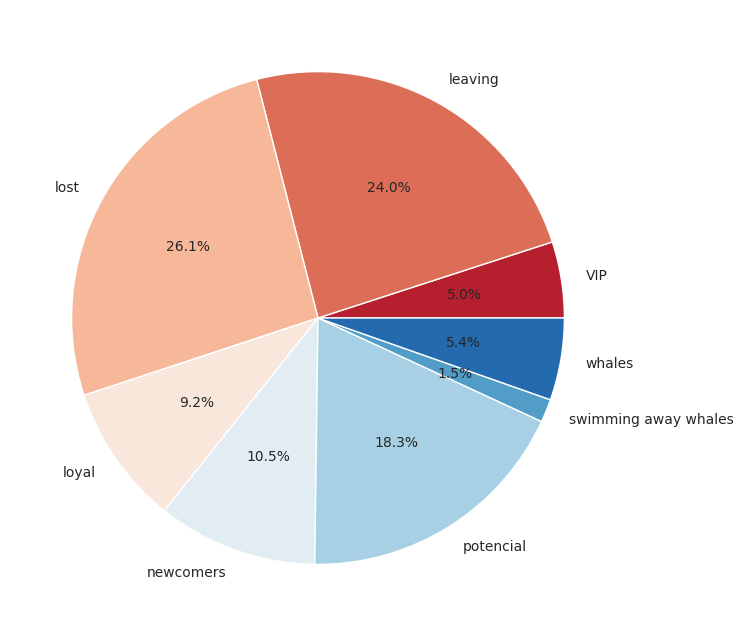

In [39]:
plt.figure(figsize = (8, 8))
sns.set_palette('RdBu',8)
plt.pie(df3['count'], labels = df3['log_group'], autopct = '%1.1f%%')
#plt.savefig('/content/Groups.png')

In [40]:
df4 = df2.groupby('rfm_segment').agg(
    count  = ('card','count'),
    group  = ('log_group', 'last')
).reset_index()
df4

,rfm_segment,count,group
0,111,296,VIP
1,112,84,loyal
2,113,2,loyal
3,121,75,whales
4,122,282,loyal
5,123,116,loyal
6,131,7,newcomers
7,132,113,newcomers
8,133,502,newcomers
9,211,137,whales


In [41]:
df4.sort_values(by = 'group')

,rfm_segment,count,group
0,111,296,VIP
22,323,132,leaving
17,233,1020,leaving
24,332,271,leaving
25,333,1545,lost
5,123,116,loyal
10,212,59,loyal
11,213,3,loyal
1,112,84,loyal
4,122,282,loyal


In [42]:
def description(rfm_segm):
    description_dict = {
        '111': 'bought recently, often, the receipt is high',
        '112': 'bought recently, often, average receipt',
        '113': 'bought recently, often, low receipt',
        '121': 'bought recently, 3-7 purchases, the receipt is high',
        '122': 'bought recently, 3-7 purchases, average receipt',
        '123': 'bought recently, 3-7 purchases, low receipt',
        '131': 'bought recently, 1-2 purchases, the receipt is high',
        '132': 'bought recently, 1-2 purchases, average receipt',
        '133': 'bought recently, 1-2 purchases, average low',
        '211': 'bought relatively recently, often, the receipt is high',
        '212': 'bought relatively recently, often, average receipt',
        '213': 'bought relatively recently, often, low receipt',
        '221': 'bought relatively recently, 3-7 purchases, the receipt is high',
        '222': 'bought relatively recently, 3-7 purchases, average receipt',
        '223': 'bought relatively recently, 3-7 purchases, low receipt',
        '231': 'bought relatively recently, 1-2 purchases, the receipt is high',
        '232': 'bought relatively recently, 1-2 purchases, average receipt',
        '233': 'bought relatively recently, 1-2 purchases, low receipt',
        '311': 'bought long time ago, often, the receipt is high',
        '312': 'bought long time ago, often, average receipt',
        '313': 'bought long time ago, often, low receipt',
        '321': 'bought long time ago, 3-7 purchases, the receipt is high',
        '322': 'bought long time ago, 3-7 purchases, average receipt',
        '323': 'bought long time ago, 3-7 purchases, low receipt',
        '331': 'bought long time ago, 1-2 purchases, the receipt is high',
        '332': 'bought long time ago, 1-2 purchases, average receipt',
        '333': 'bought long time ago, 1-2 purchases, low receipt',
    }
    return description_dict.get(rfm_segm, 'Unknown')

df4['description'] = df4['rfm_segment'].apply(description)

In [43]:
mask = (df4['group'] == 'VIP')
df4[mask]

,rfm_segment,count,group,description
0,111,296,VIP,"bought recently, often, the receipt is high"


VIP is the absolute leaders among clients and they make up 5% of the total number of clients. They bring a significant share of the company's revenue + can be a good source of advertising for the company.


In [44]:
mask = (df4['group'] == 'whales')
df4[mask]

,rfm_segment,count,group,description
3,121,75,whales,"bought recently, 3-7 purchases, the receipt is..."
9,211,137,whales,"bought relatively recently, often, the receipt..."
12,221,107,whales,"bought relatively recently, 3-7 purchases, the..."


The whale group makes up 5.4% of the total number of clients. They buy irregularly but spend large amounts. With the right approach, clients from this group can be turned into VIP clients. It is necessary to study the needs of customers and what they bought. It is possible to suggest new products from a similar category and receive feedback. This group does not require additional discounts or bonuses.

In [45]:
mask = (df4['group'] == 'swimming away whales')
df4[mask]

,rfm_segment,count,group,description
15,231,18,swimming away whales,"bought relatively recently, 1-2 purchases, the..."
18,311,21,swimming away whales,"bought long time ago, often, the receipt is high"
20,321,36,swimming away whales,"bought long time ago, 3-7 purchases, the recei..."
23,331,15,swimming away whales,"bought long time ago, 1-2 purchases, the recei..."


There are only 90 clients in this group, which is only 1.5% of the total. This is a small group but important because these clients once spent large sums of money, but for some reason they stopped doing so. It is important to find out the reason for the departure of such customers and make sure that they buy regularly.

In [46]:
mask = (df4['group'] == 'leaving')
df4[mask]

,rfm_segment,count,group,description
17,233,1020,leaving,"bought relatively recently, 1-2 purchases, low..."
22,323,132,leaving,"bought long time ago, 3-7 purchases, low receipt"
24,332,271,leaving,"bought long time ago, 1-2 purchases, average r..."


This is a large group of customers (24%) who have previously made small purchases with us, and 90% of these customers have made one or two purchases. Anyone can get into this group, just like those who, in principle, go to the pharmacy once a year because... they have no health problems and their home medicine cabinet consists of 2-3 medications. Perhaps the person has moved to another area. But of course there may be clients here who can be returned. They live nearby, go to pharmacies, but to different ones. The cost of winning back customers from this group can be quite high because this group is quite large. Therefore, all risks must be taken into account.

In [47]:
mask = (df4['group'] == 'newcomers')
df4[mask]

,rfm_segment,count,group,description
6,131,7,newcomers,"bought recently, 1-2 purchases, the receipt is..."
7,132,113,newcomers,"bought recently, 1-2 purchases, average receipt"
8,133,502,newcomers,"bought recently, 1-2 purchases, average low"


A separate group included customers who made their last purchase within the last month, and these customers usually bought from us 1-2 times, so I called them newcomers. And with the right interaction, such buyers can become regular ones. This is quite an impressive group and makes up 10.5% of the total.

In [48]:
mask = (df4['group'] == 'potencial')
df4[mask]

The group Potencial includes 1,085 buyers and is not as homogeneous as the other groups, but one general concept of behavior applies to it. There are 215 buyers here (segments 312 and 322) who have not visited us for a long time (more than 130 days), although they used to buy regularly and for average amounts, i.e. These were not random buyers. The remaining 80% of buyers from this group have not been with us for more than a month, and 445 buyers from this group have made 3-7 purchases. Our task is for them to buy from us more regularly

In [49]:
mask = (df4['group'] == 'loyal')
df4[mask]

Loyal customers - 9.2%, these customers are already our regular customers. You can offer them new products, invite them to subscribe to social networks, and conduct surveys with them. Conducting surveys will help identify weak links in the pharmacy chain. The goal of working with the group is to increase their average bill by teaching them about products that are new to them.

In [50]:
mask = (df4['group'] == 'lost')
df4[mask]
df4[mask].to_excel('lost.xlsx', index=False)

This is a group of lost clients and most likely irretrievably lost. You can try to get them back with a special offer or discount, but don't put in too much effort and expense, it's not worth it, especially considering that this is a fairly large group at 26.1%
